# Explorations with heterogenous observability actor-critic agents with multiple histories

In [1]:
from pyCRLD.Environments.Base import ebase

from fastcore.utils import *
from fastcore.test import *

from pyCRLD.Environments.HeterogeneousObservationsEnv import (
    HeterogeneousObservationsEnv,
)
from pyCRLD.Environments.MultipleObsSocialDilemma import MultipleObsSocialDilemma

from pyCRLD.Agents.POStrategyActorCritic import POstratAC
from pyCRLD.Utils import FlowPlot as fp

from pyCRLD.Environments.HistoryEmbedding import HistoryEmbedded, ObsActHistsIx, hOset

import numpy as np
import matplotlib.pyplot as plt

### Several experiments using 1 history with partial heterogeneuos observability with focus on diagonal matrixes: 

In [2]:
env_full_obs_homo = MultipleObsSocialDilemma(
    rewards=1,
    temptations=1.2,
    suckers_payoffs=-0.5,
    punishments=0,
    observation_value=[1, 0.1],
)

In [3]:
env_full_obs_homo.Sset

['.']

In [4]:
env_full_obs_homo.Oset

[['.'], ['.']]

In [5]:
env_full_obs_homo.O

array([[[1.]],

       [[1.]]])

In [6]:
memo1pd = HistoryEmbedded(
    env_full_obs_homo,
    h=(1, 1, 1),
    observation_type="diagonal_confidence",
    observation_value=[1, 0.1],
)

In [7]:
memo1pd.Oset

[['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|'],
 ['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|']]

In [8]:
memo1pd.O

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]])

In [9]:
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0, 1, 2, 3], [0])
y = ([1], [0, 1, 2, 3], [0])

In [10]:
mae1.env.Sset

['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|']

In [11]:
# TODO: I don't really understand why the set of a history looks like this?
mae1.env.Oset

[['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|'],
 ['c,c,.|', 'c,d,.|', 'd,c,.|', 'd,d,.|']]

In [12]:
# UPPER DIAGONAL with high probability to observe defection
memo1pd.O[1] = np.array([
        [0.25, 0.25, 0.25, 0.25],
        [0.0, 0.25, 0.25, 0.5],
        [0.0, 0.0, 0.25, 0.75],
        [0.0, 0.0, 0.0, 1],
    ])
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0, 1, 2, 3], [0])
y = ([1], [0, 1, 2, 3], [0])

 [plot] generating data 99 %   

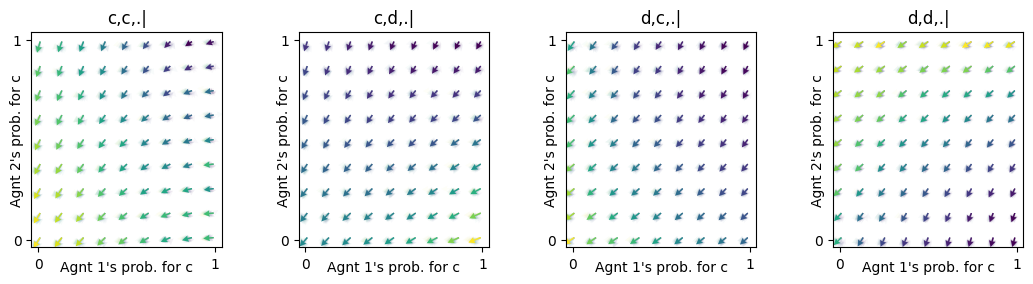

In [13]:
ax = fp.plot_strategy_flow(
    mae1,
    x,
    y,
    flowarrow_points=np.linspace(0.01, 0.99, 9),
    NrRandom=32,
    conds=mae1.env.Sset,
    verbose=True,
)

If you increase the probability of observing D,D it greatly decreases capacity for cooperation.

In [14]:
# Partial observability everywhere but in the C,C array
memo1pd.O[1] = np.array(
    [
        [1, 0.0, 0.0, 0.0],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
    ]
)
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0, 1, 2, 3], [0])
y = ([1], [0, 1, 2, 3], [0])

 [plot] generating data 99 %   

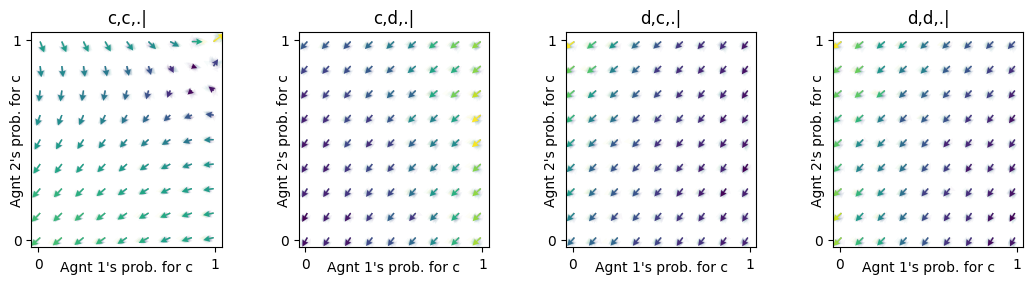

In [15]:
ax = fp.plot_strategy_flow(
    mae1,
    x,
    y,
    flowarrow_points=np.linspace(0.01, 0.99, 9),
    NrRandom=32,
    conds=mae1.env.Sset,
    verbose=True,
)

It's a mix. But it decreases cooperative outcomes, as expected because their memory is just shorter so iterated results of cooperation boosts don't work here. This makes sense for 1 iteration, I'm curious about how this would change in a larger memory space. E.g how much having remembered one cooperation will be benefitial to the rest of the outcomes?

In [16]:
# Partial observability everywhere
memo1pd.O[1] = np.array(
    [
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
    ]
)
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0, 1, 2, 3], [0])
y = ([1], [0, 1, 2, 3], [0])

 [plot] generating data 99 %   

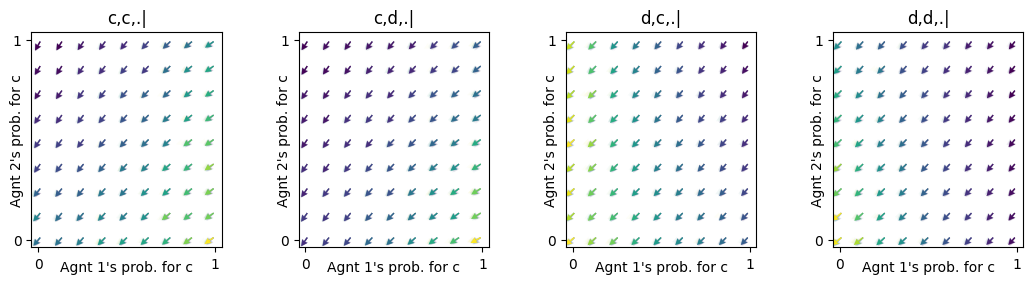

In [17]:
ax = fp.plot_strategy_flow(
    mae1,
    x,
    y,
    flowarrow_points=np.linspace(0.01, 0.99, 9),
    NrRandom=32,
    conds=mae1.env.Sset,
    verbose=True,
)

In [18]:
# LOWER DIAGONAL with high probability to observe cooperation
memo1pd.O[1] = np.array(
    [[1, 0, 0, 0], [0.75, 0.25, 0, 0], [0.5, 0.25, 0.25, 0.0], [0.25, 0.25, 0.25, 0.25]]
)
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0, 1, 2, 3], [0])
y = ([1], [0, 1, 2, 3], [0])

 [plot] generating data 99 %   

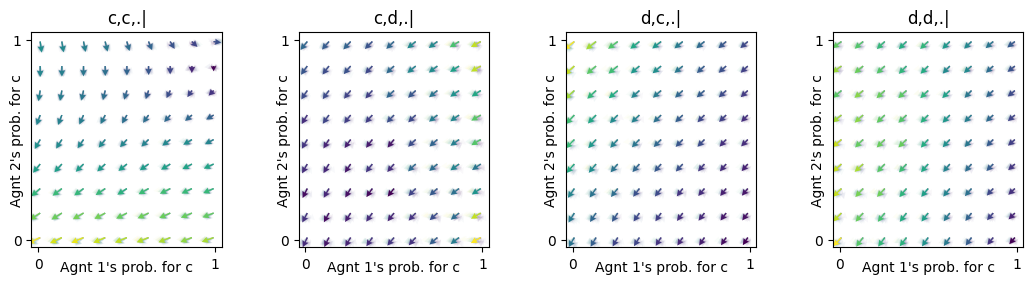

In [19]:
ax = fp.plot_strategy_flow(
    mae1,
    x,
    y,
    flowarrow_points=np.linspace(0.01, 0.99, 9),
    NrRandom=32,
    conds=mae1.env.Sset,
    verbose=True,
)

### TODO:

```python
# UPPER DIAGONAL with high probability to observe defection
memo1pd.O[1]=np.array([[0.25, 0.25, 0.25, 0.25  ],
                       [0.  , 0.25, 0.25, 0.5  ],
                       [0.  , 0.  , 0.25, 0.75  ],
                       [0.  , 0.  , 0.  , 1]])
```

```python
# LOWER DIAGONAL with high probability to observe cooperation
memo1pd.O[1]=np.array([[1, 0, 0, 0  ],
                       [0.75  , 0.25, 0, 0  ],
                       [0.5  , 0.25  , 0.25, 0.  ],
                       [0.25  , 0.25  , 0.25  , 0.25]])
```

### Experiment with 2 history and extreme heterogenous agents (fully blind and fully knowlegeable):

In [20]:
env_hetero_extreme = MultipleObsSocialDilemma(
    rewards=1,
    temptations=1.2,
    suckers_payoffs=-0.5,
    punishments=0,
    observation_value=[1, 0],
)

In [21]:
env_hetero_extreme.O

array([[[1.]],

       [[1.]]])

In [22]:
memo1pd = HistoryEmbedded(
    env_hetero_extreme, h=(2, 2, 2), observation_type=["default", "fill"]
)

In [23]:
memo1pd.O

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [24]:
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0])
y = ([1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0])

 [plot] generating data 99 %    0. %   

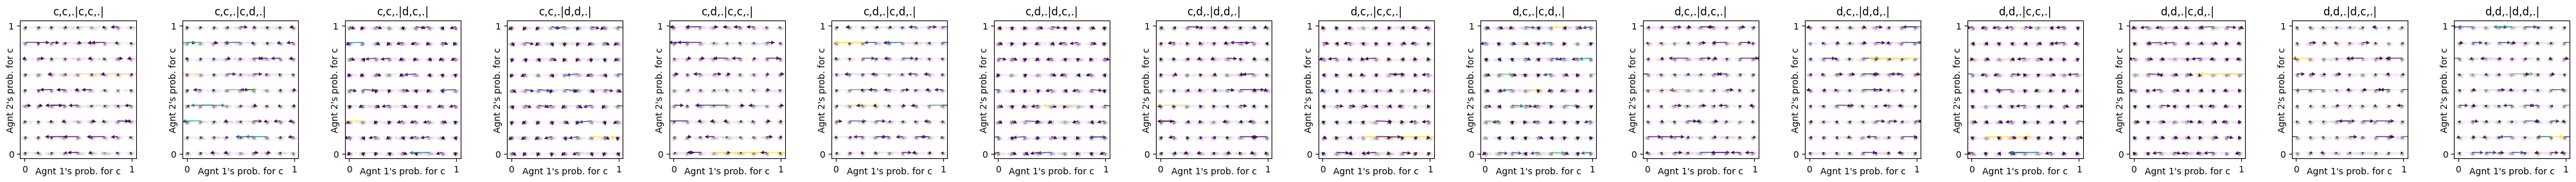

In [25]:
ax = fp.plot_strategy_flow(
    mae1,
    x,
    y,
    flowarrow_points=np.linspace(0.01, 0.99, 9),
    NrRandom=32,
    conds=mae1.env.Sset,
    verbose=True,
)
fig = plt.gcf()  # Get current figure
#fig.savefig("h222_a0_1_full_obs_default_a1_0_full_blind_fill.png")

### Experiments with 2 history and default heterogenous agents:

In [26]:
env_hetero_default = MultipleObsSocialDilemma(
    rewards=1,
    temptations=1.2,
    suckers_payoffs=-0.5,
    punishments=0,
    observation_value=[1, 0.5],
)

In [27]:
memo1pd = HistoryEmbedded(
    env_hetero_default, h=(2, 2, 2), observation_type=["default", "default"]
)

In [28]:
memo1pd.O

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [29]:
mae1 = POstratAC(env=memo1pd, learning_rates=0.1, discount_factors=0.9)
x = ([0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0])
y = ([1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [0])

 [plot] generating data 99 %   

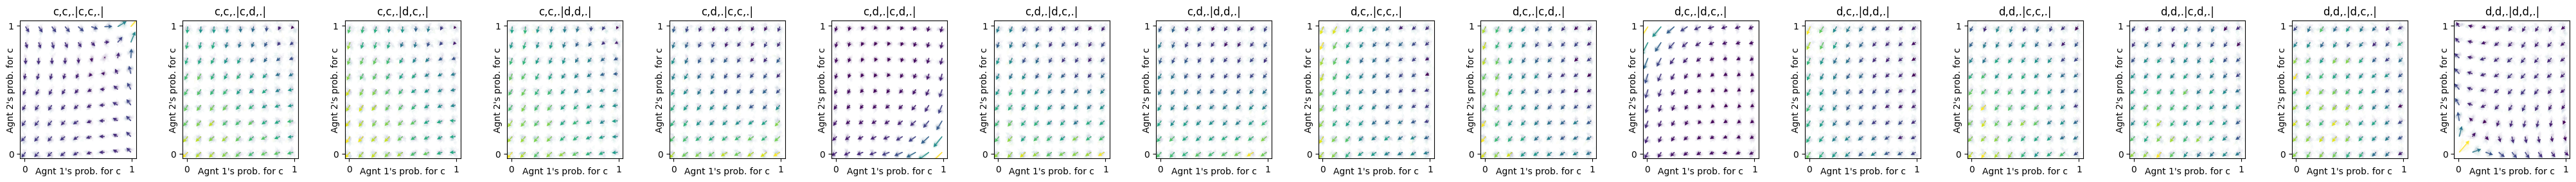

In [30]:
ax = fp.plot_strategy_flow(
    mae1,
    x,
    y,
    flowarrow_points=np.linspace(0.01, 0.99, 9),
    NrRandom=32,
    conds=mae1.env.Sset,
    verbose=True,
)
fig = plt.gcf()  # Get current figure
#fig.savefig("h222_a0_1_full_obs_default_a1_05_003_default.png")